# Q Learning
### Introduction
Today, you'll learn about QLearning using the gym api.
> Gym is a standard API for reinforcement learning, and a diverse collection of reference environments.

Reinforcement learning is a subset of Artificial Intelligence. Our AI will learn by playing the same game over and over again until it learns what it must do in order to win.

In this workshop, you will:

1. Learn about Q Tables
2. Setup a gym environment
3. Train an AI to solve the [FrozenLake environment](https://gymnasium.farama.org/environments/toy_text/frozen_lake/)

Let's start by importing the required libraries:

In [1]:
import random
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

## 1. Q-Learning

A simple example of Q-Learning: 

![Example of a Q-Learning Environment](./images/example.png)

A game where the AI must get to the “End” coordinates on the map in the shortest amount of time while avoiding the bombs and collecting the bonuses.

A Q-Table for this environment could be visualized like this. 

![Example of a Q-Table](./images/qtable.png)

With all of the possible actions listed horizontally and all of the possible states listed vertically.

Write a function which generates an empty array of shape `x` * `y`.

In [2]:
def init_q_table(x: int, y: int) -> np.ndarray:
    """
    This function must return a 2D matrix containing only zeros for values.
    """
    return np.zeros((x, y))

qTable = init_q_table(5, 4)

print("Q-Table:\n" + str(qTable))

assert(np.mean(qTable) == 0)

Q-Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In reinforcement learning, the AI receives a **reward** each time it **acts**:

This reward is a number that will be interpreted by our AI:

- If it is negative, the AI will learn that the action it made which led to this reward was probably not the best
- If it is null or positive, the AI will learn that the action it made which led to this reward was probably smart and it should do it again.

Here, the AI would likely receive a **negative reward** (-1) if it chooses to move to the right (because there's a bomb)

However, if it went anywhere else, it would probably receive a **neutral reward** (0), since it would end up on blank squares.

Assuming it decided to go to the right, the AI would encounter a bomb and the value for [Start, Move_Right] would decrease.


Once we receive a reward, we can use the Q Formula below to update our Q Table's values. Our AI will use these values to learn what the most profitable action is at each state of the environment.

![QFormula](./images/qformula.png)

#### Translation:

**Q<sup>new</sup>(s<sub>t</sub>, a<sub>t</sub>)** = the new value for the current State and Action on our Qtable

**Q(s<sub>t</sub>, a<sub>t</sub>)** = the old value for the current State and Action on our QTable

**α (learning rate)** = a constant value we use for our algorithm's learning speed (usually a number between 0.5 and 0.05)

**r<sub>t</sub> (reward)** = the reward received (as per the example above, -1 if you hit a bomb)

**𝛾 (discount factor)** = another constant value we use to determine how good of a memory our AI has

**max Q<sup>new</sup>(s<sub>t+1</sub>, a)** = the value of the most profitable action at the new state

##### Now that you know how a Q Table updates itself using the Q Formula, let's try to implement this formula as a python function:
(You can use the `LEARNING_RATE` and `DISCOUNT_RATE` constants in your formula)

In [3]:
LEARNING_RATE = 0.05
DISCOUNT_RATE = 0.99

def q_function(q_table: np.ndarray, state: int, action: int, reward: int, newState: int) -> float:
    """
    This function must implement the q_function equation pictured above.

    It should return the updated q-table.
    """
    current = q_table[state, action]
    future = np.max(q_table[newState])
    return current + LEARNING_RATE * (reward + DISCOUNT_RATE * future - current)

Now, you can test the Q Function to see if it works !\
If qTable[0, 1]'s value below is `-0.05`, congrats: you have successfully implemented the formula !

In [4]:
q_table = init_q_table(5,4)

q_table[0, 1] = q_function(q_table, state=0, action=1, reward=-1, newState=3)

print("Q-Table after action:\n" + str(q_table))

assert(q_table[0, 1] == -LEARNING_RATE), f"The Q function is incorrect: the value of qTable[0, 1] should be -{LEARNING_RATE}"

Q-Table after action:
[[ 0.   -0.05  0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]]


## 2. Setting up the GYM Environment

#### What is Gym ?
> Gym is a standard API for reinforcement learning, and a diverse collection of reference environments
>
> -- <cite>Gym Docs</cite>

Let's get to the fun part:
Read the documentation for FrozenLake [here](https://gymnasium.farama.org/environments/toy_text/frozen_lake/)
and find out how to load the environment.

For now, we will set the `is_slippery` variable to `False` 


In [5]:
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False, render_mode="rgb_array")

Now that our environment is loaded, we need a function that performs a random action.

An action is a number between 0 and the total number of possible actions.

Try to find the value (inside `env`) that gives this total number of actions in the environment and store it in `total_actions`.

In [6]:
total_actions = env.action_space.n

assert(total_actions == 4), f"There are a total of four possible actions in this environment. Your answer is {total_actions}"

Now you can use `total_actions` to make a function which returns a random action each time it is called !

There is also another way to do it...

In [7]:
def random_action(env):
    return env.action_space.sample()

With the `random_action` function, you can run the code below which will display the first frame of the environment.

actions: 4
states: 16
Current state: 1


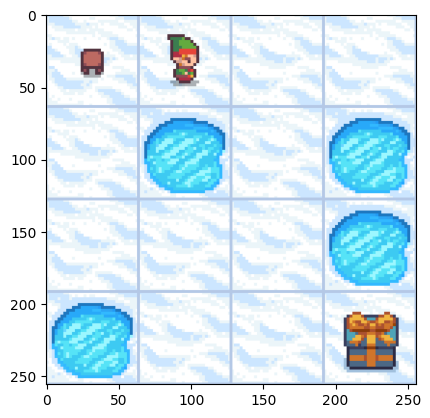

In [8]:
observation, info = env.reset()

action = random_action(env)
observation, reward, terminated, truncated, info = env.step(action)

plt.imshow(env.render())

print(f"actions: {env.action_space.n}\nstates: {env.observation_space.n}")
print(f"Current state: {observation}")

env.close()

In this environment, there are **4 possible actions** for each of the **16 possible states**.\
Feel free to play around with the code above to get a better understanding of the API.

## 3. Solving the environment

Now that we've got a Q Table, Q Function and our environment, we can create our `game_loop`.

Call `q_function()` using the correct arguments it requires in the code below to update the `qTable[,]` using the values available in the function.

In [9]:
def game_loop(env: gym.Env, q_table: np.ndarray, state: int, action: int) -> tuple:
    new_state, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    q_table[state, action] = q_function(q_table, state, action, reward, new_state)
    return q_table, new_state, done, reward

Run the code below to see how the environment runs using your `game_loop`.

In [10]:
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False, render_mode="human")
q_table = init_q_table(env.observation_space.n, env.action_space.n)

state, info = env.reset()
while (True):
    env.render()
    action = random_action(env)
    q_table, state, done, reward = game_loop(env, q_table, state, action)
    if done:
        break
env.close()

2025-12-03 19:32:25.490 python[99862:11615250] +[IMKClient subclass]: chose IMKClient_Modern
2025-12-03 19:32:25.490 python[99862:11615250] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Now, to see if our AI learns, we will launch the environment 1000 times and see how the Q-Table evolves.

Notice how in the code below, we do not call `env.render()` each frame because if we did, our 1000 iterations would take a **lot** of time to complete.

In [11]:
EPOCH = 20000

env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False)
q_table = init_q_table(env.observation_space.n, env.action_space.n)

for i in range(EPOCH):
    state, info = env.reset()
    while (True):
        # This time, we won't render the game each frame because it would take too long
        action = random_action(env)
        q_table, state, done, reward = game_loop(env, q_table, state, action)
        if done:
            break
env.close()

# Printing the QTable result:
for states in q_table:
    for actions in states:
        if (actions == max(states)):
            print("\033[4m", end="")
        else:
            print("\033[0m", end="")
        if (actions > 0):
            print("\033[92m", end="")
        else:
            print("\033[00m", end="")
        print(round(actions, 3), end="\t")
    print()

0.941	0.951	0.951	0.941	
0.941	0.0	0.961	0.951	
0.951	0.97	0.951	0.961	
0.961	0.0	0.951	0.951	
0.951	0.961	0.0	0.941	
0.0	0.0	0.0	0.0	
0.0	0.98	0.0	0.961	
0.0	0.0	0.0	0.0	
0.961	0.0	0.97	0.951	
0.961	0.98	0.98	0.0	
0.97	0.99	0.0	0.97	
0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	
0.0	0.98	0.99	0.97	
0.98	0.99	1.0	0.98	
0.0	0.0	0.0	0.0	


Great ! We now have a nice Q-Table that indicates which action is best for each state.

Now, it would probably be better for our agent to choose actions based on its experience, rather than at random.
Write a function which chooses the best action for each given state:

In [12]:
def best_action(q_table: np.ndarray, state: int) -> int:
    """
    Write a function which finds the best action for the given state.

    It should return its index.
    """
    return np.argmax(q_table[state])

Run the code below to see the result of our training !

In [13]:
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False, render_mode="human")

state, info = env.reset()
while (True):
    env.render()
    action = best_action(q_table, state)
    q_table, state, done, reward = game_loop(env, q_table, state, action)
    if done:
        break

env.close()

##### If all went well, our AI should easily reach its goal !

However, the AI should probably try to explore all the different possibilities before it starts optimising its gain by following the Q Table...\
In order to solve this problem, we can use the Epsilon-Greedy strategy!

### What is Epsilon Greedy ?

Epsilon greedy is a strategy used to make sure that our AI explores its environment and doesn’t miss out on some cool easter eggs !

![EpsilonGreedy](https://steadfast-ragdoll-d83.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2Fa8444925-9940-46b2-b9e3-aae5ca792a74%2FUntitled.png?table=block&id=ce90b632-5d78-4cb0-8101-b326b91bf25d&spaceId=a008bb22-92df-498d-b32c-15988ddb70b9&width=770&userId=&cache=v2)

<cite>[source](https://medium.com/analytics-vidhya/the-epsilon-greedy-algorithm-for-reinforcement-learning-5fe6f96dc870)</cite>

```
if random(0, 1) > epsilon-greedy:
	return bestKnownAction
else:
	return randomAction
```
		
The higher the epsilon-greedy value is (from 0 to 1), the higher chance of the AI picking an action at random.

The lower the epsilon-greedy value is (from 0 to 1 still), the higher chance of the AI picking an action it considers the most rewarding.

In other words, with a high epsilon-greedy value, the robot pictured above might go to the right whereas it would probably choose the left path if it had a lower epsilon-greedy value, therefore missing out on a special discovery !



Try to implement it into the following function that we'll use to determine which action the AI will choose:

In [14]:
def choose_action(epsilon: float, q_table: np.ndarray, state: int, env: gym.Env) -> int:
    """
    Write a function to either return a random action or the best action using the functions
    defined earlier.
    """
    explore = random.random() < epsilon
    if explore:
        return random_action(env)
    return best_action(q_table, state)

With this function, the AI will explore all possible actions before it chooses the best state, reducing the risk of it missing some golden solutions.

But we're not done...\
You might have noticed that when we load our environment, we give it a certain argument:\
`is_slippery=False`

This argument makes the game far easier !
If you want a real challenge, set it to true.

But the environment will be much harder to solve if the ice is slippery. Our agent's movements will be unpredictable and it will be impossible to make a 100% accurate AI.

Therefore, keep track of the number of times the AI gets to its goal during our testing phase.

##### Try to get the highest accuracy possible !

71.0% winrate
71.0


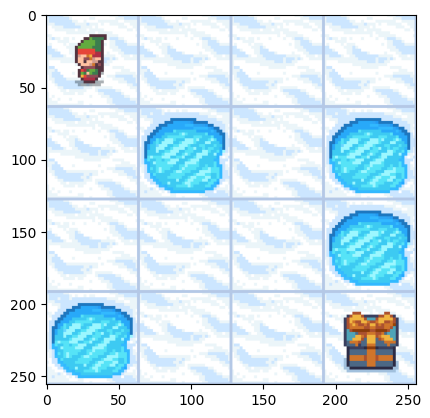

In [17]:
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=True, render_mode="rgb_array")

q_table = init_q_table(env.observation_space.n, env.action_space.n)

# Training the AI
epsilon = 1.0
for i in range(10000):
    epsilon = max(epsilon - 0.0001, 0)
    state, info = env.reset()
    while (True):
        action = choose_action(epsilon, q_table, state, env)
        q_table, state, done, reward = game_loop(env, q_table, state, action)
        if done:
            break
# Testing the AI
wins = 0.0
for i in range(100):
    state, info = env.reset()
    while (True):
        action = choose_action(0, q_table, state, env)
        _, state, done, reward = game_loop(env, q_table, state, action)
        if done:
            if (reward > 0):
                wins += 1
            break

print(f"{round(wins / (i+1) * 100, 2)}% winrate")
print(wins)

# Displaying the last frame of the game
plt.imshow(env.render())

env.close()

Great job ! You completed this workshop !
If you want to continue in the wonderful world of reinforcement learning, you could try:
- Try and increase the accuracy by using different methods of reinforcement learning.
- A custom map for Frozen Lake. For example: `gym.make('FrozenLake-v1', map_name="8x8", is_slippery=True)`
- A different environment from https://gymnasium.farama.org/
- Going **deeper** with https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html
- Trying what you've learned with games you know and love:
    - https://gymnasium.farama.org/environments/atari/
    - https://pypi.org/project/gym-super-mario-bros/